## Operation

In [1]:
class Operation():
    
    def __init__(self,input_nodes = []):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [2]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var 

In [3]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var 

In [4]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var) 

## Placeholder

In [5]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

## Variable

In [19]:
class Variable():
    
    def __init__(self,initial_value = None ):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

## Graph

In [25]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
    
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax+b 

A = 10

b = 1

z = 10x+1


In [26]:
g = Graph()
g.set_as_default()

In [27]:
A = Variable(10)
b = Variable(1)
x = Placeholder()

In [28]:
y = multiply(A,x)
z = add(y,b)

## Session

In [50]:
import numpy as np

In [38]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(operation)
    return nodes_postorder

In [43]:
class Session():
    
    def run(self,operation,feed_dict = {}):
        
        node_postorder = traverse_postorder(operation)
        
        for node in node_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
            
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [46]:
sess = Session()
result = sess.run(operation = z,feed_dict = {x:15})

In [47]:
result

151

In [48]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)
z = add(y,b)

In [51]:
sess = Session()
result = sess.run(operation = z,feed_dict = {x:15})

In [52]:
result

array([[151, 302],
       [451, 602]])

## Classification

### Activation Function

In [58]:

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [56]:
sample_x = np.linspace(-10,10,100)
sample_y = sigmoid(sample_x)

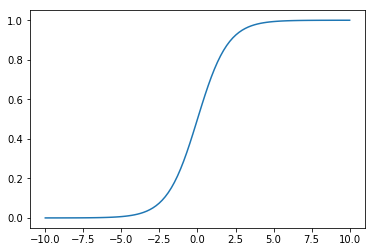

In [59]:
plt.plot(sample_x,sample_y)

In [95]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
    
    def compute(self,z_val):
        return 1 / (1 + np.exp(-z_val))

In [77]:
from sklearn.datasets import make_blobs

In [78]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [79]:
features = data[0]
labels = data[1]

In [80]:
cols = {0:'r',1:"b"}

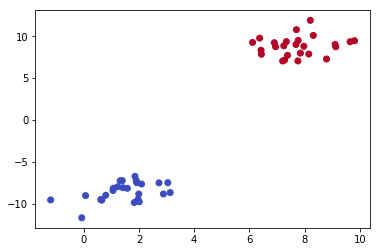

In [83]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

#### y = mx+b

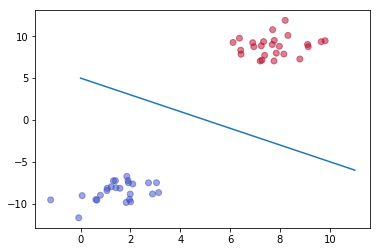

In [86]:
x = np.linspace(0,11,10)
y = -x +5
#y+x-5 = 0
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm',alpha=0.5)
plt.plot(x,y)

### (1,1) * f - 5 = 0
w*x+b

In [88]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [89]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [96]:
g = Graph()
g.set_as_default()

In [97]:
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)
a = Sigmoid(z)

In [98]:
sess = Session()
sess.run(operation = a,feed_dict = {x:[8,10]})

0.999997739675702

In [99]:

sess.run(operation = a,feed_dict = {x:[0,-10]})

3.059022269256247e-07